<a href="https://www.kaggle.com/code/patrickleal/brazilian-stadiums-analysis-viz?scriptVersionId=145630970" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Importing libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
stadiums = pd.read_csv('/kaggle/input/brazilian-stadiums-dataset/brazilian-stadiums-v2_0.csv')
stadium_details = pd.read_csv('/kaggle/input/brazilian-stadiums-dataset/brazilian-stadium-details-v2_0.csv') 

# **Data Analysis**

## **Perguntas:**

1. Há quantos proprietários distintos?
1. tem quantos estádios por proprietário?
1. quantas UFs distintas tem estádios?
1. tem quantas cidades com estádios por Ufs?
1. qual é a capacidade média dos estádios por cidade?
1. Qual é o estádio com maior capacidade por UFs?
1. Top 10 estádios por capacidade?
1. Bottom 10 estádios por capacidade?
1. Top 10 cidades por quantidade de estadios
1. Bottom 10 cidades por quantidade de estadios



**Há quantos proprietários distintos?**

In [3]:
print('Count of Owners: ', stadiums['Owner'].nunique())

Count of Owners:  5


**tem quantos estádios por proprietário?**

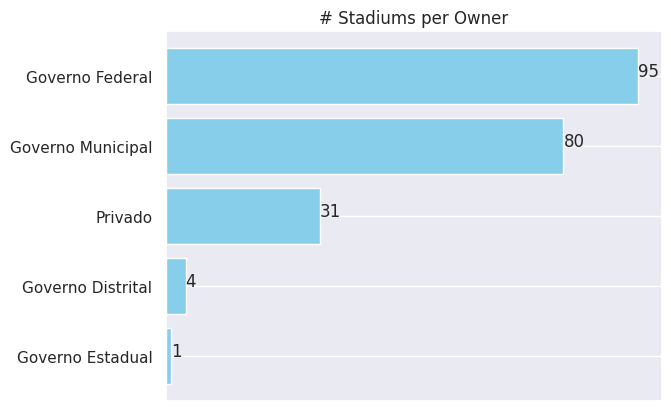

In [4]:
stadium_per_owner = pd.DataFrame(stadiums['Owner'].value_counts())
stadium_per_owner = stadium_per_owner.sort_values(by='count', ascending=True)
labels = stadiums['Owner'].unique()

plt.barh(labels, stadium_per_owner['count'], color='skyblue')
plt.title('# Stadiums per Owner')

# Remove the xticks
plt.xticks([])

for index, value in enumerate(stadium_per_owner['count']):
    plt.text(value, index, str(value), ha='left')

plt.show()

**quantas UFs distintas tem estádios?**

In [5]:
print('Count of Federative Units: ', stadiums['Federative_Units'].nunique())

Count of Federative Units:  27


All the Federative Units of Brazil have stadiums because Brazil has 27 FUs in total.

**tem quantas cidades com estádios por Ufs?**

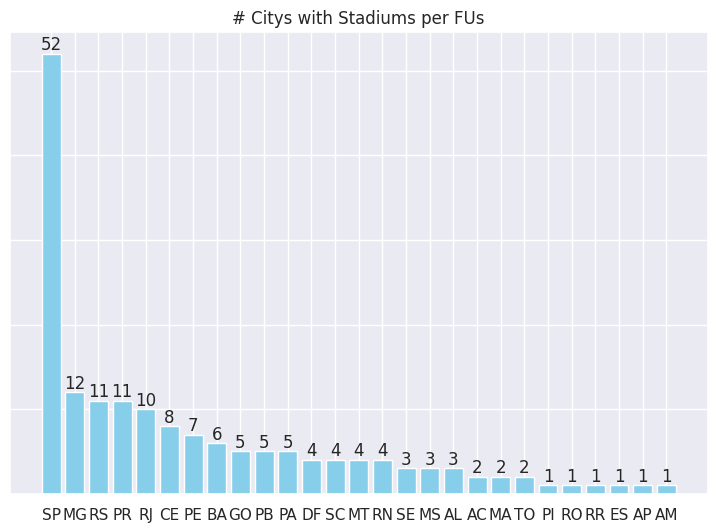

In [6]:
uniq_city_per_FUs = pd.DataFrame(stadiums.groupby('Federative_Units')['Locality'].nunique())
uniq_city_per_FUs = uniq_city_per_FUs.sort_values(by='Locality', ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(9, 6))

bar_container = ax.bar(uniq_city_per_FUs['Federative_Units'], uniq_city_per_FUs['Locality'],
                      color='skyblue')
ax.bar_label(bar_container)

# Esconder os rótulos (labels) do eixo y, mantendo os tiques (tics)
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.title("# Citys with Stadiums per FUs")

plt.show()

alterar visual depois

**5) qual é a capacidade média dos estádios por cidade?**

In [7]:
avg_capacity_per_city = stadiums.groupby('Locality')['Capacity'].describe().reset_index()
avg_capacity_per_city = avg_capacity_per_city[['Locality', 'count', 'mean']]

# analysing only the citys that have 2 or more stadiums
avg_capacity_per_city = avg_capacity_per_city[avg_capacity_per_city['count'] >= 2]

avg_capacity_per_city_top10 = avg_capacity_per_city[['Locality', 'mean']].sort_values(by='mean', ascending=False).head(10)
avg_capacity_per_city_bottom10 = avg_capacity_per_city[['Locality', 'mean']].sort_values(by='mean', ascending=False).tail(10)

In [8]:
colormap = ['YlGn', 'YlGn_r', 'OrRd', 'OrRd_r', 'summer', 'summer_r', 'autumn', 'autumn_r']

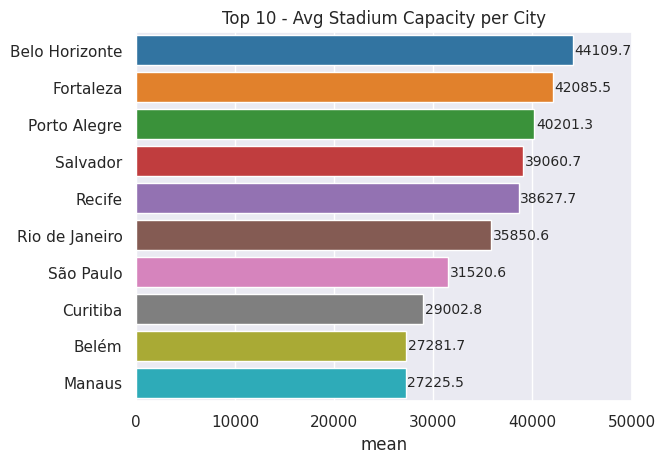

In [9]:
fig, ax = plt.subplots()

sns.barplot(x='mean', y='Locality', data=avg_capacity_per_city_top10, palette='tab10')
plt.title('Top 10 - Avg Stadium Capacity per City')

ax.set(xlim=(0, 50000), ylabel="")

ax.bar_label(ax.containers[0], fontsize=10, padding=1)

plt.show()

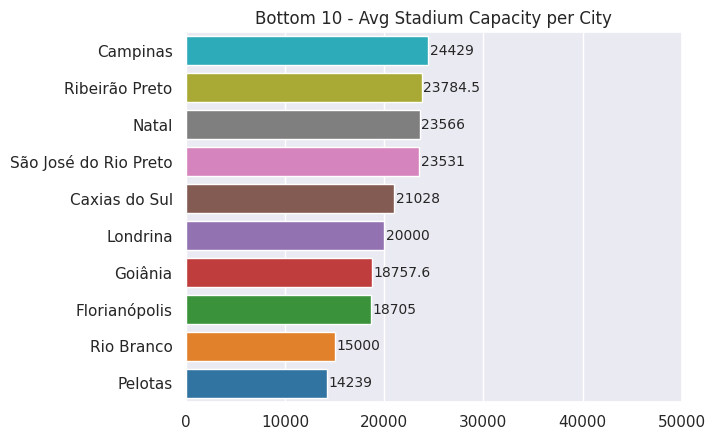

In [10]:
# Initialize the matplotlib figure
fig, ax = plt.subplots()

sns.barplot(x='mean', y='Locality', data=avg_capacity_per_city_bottom10, palette='tab10_r')
plt.title('Bottom 10 - Avg Stadium Capacity per City')

ax.set(xlim=(0, 50000), ylabel="",
      xlabel="")
ax.bar_label(ax.containers[0], fontsize=10, padding=1)

plt.show()

**6) Qual é o estádio com maior capacidade por UFs?**

In [11]:
max_capacity_per_FUs = stadiums.loc[stadiums.groupby('Federative_Units')['Capacity'].idxmax()].reset_index()
max_capacity_per_FUs = max_capacity_per_FUs[['Federative_Units', 'Stadium_Name', 'Capacity']]
max_capacity_per_FUs = max_capacity_per_FUs.sort_values(by='Capacity')

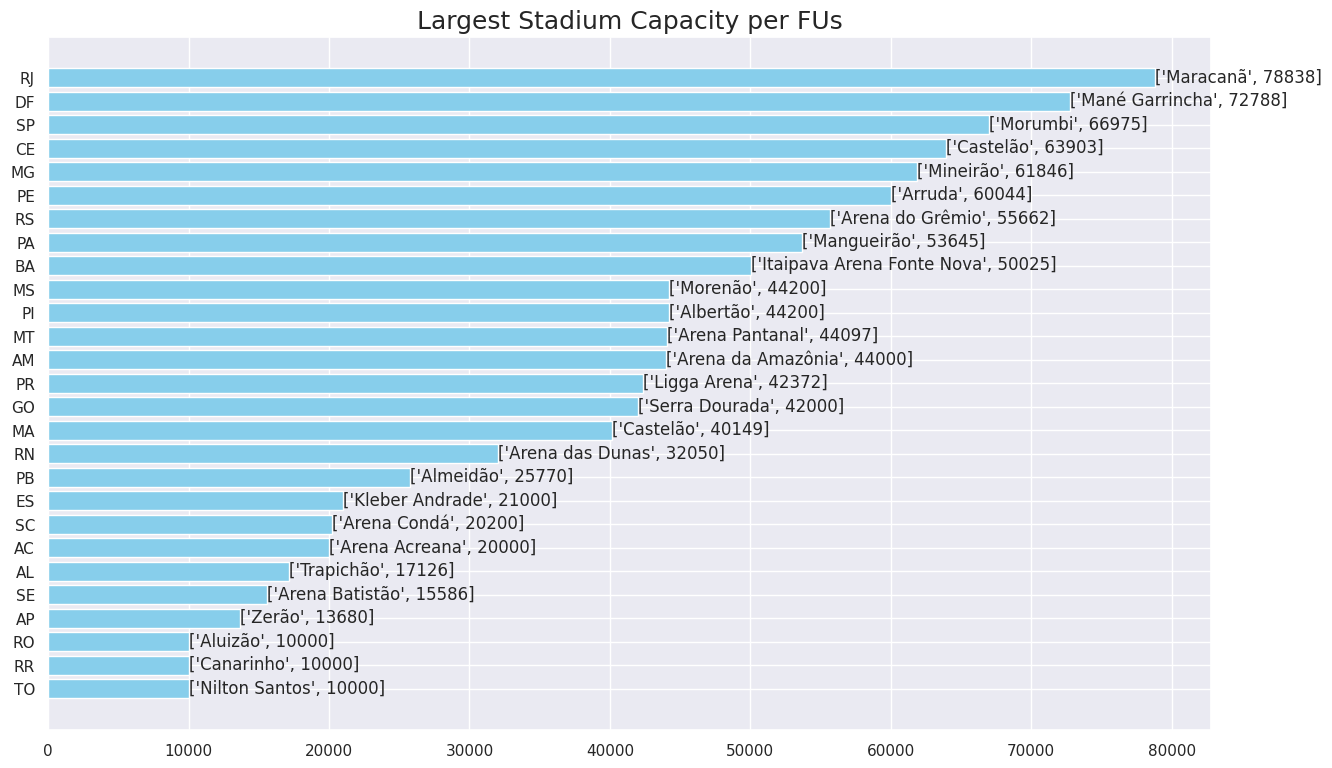

In [12]:
# creating the plot
fig, ax = plt.subplots(figsize=(15, 9))
bars = ax.barh(max_capacity_per_FUs['Federative_Units'], max_capacity_per_FUs['Capacity'], 
               color='skyblue')

# displaying the capacity and the stadium names on the bars
bar_labels = list(max_capacity_per_FUs['Stadium_Name'])
for bar, capacity, label in zip(bars, max_capacity_per_FUs['Capacity'], bar_labels):
    ax.text(capacity, bar.get_y() + bar.get_height() / 3.5 , str([label, capacity]), ha='left')

plt.title("Largest Stadium Capacity per FUs", fontsize=18)

plt.show()

alterar visual depois

**Top 10 estádios por capacidade?**

In [13]:
stadiums[['Stadium_Name', 'Capacity']].sort_values(by='Capacity', ascending=False).head(10)\
                                      .style.background_gradient(cmap=colormap[5])

,Stadium_Name,Capacity
0,Maracanã,78838
1,Mané Garrincha,72788
2,Morumbi,66975
3,Castelão,63903
4,Mineirão,61846
5,Arruda,60044
6,Arena do Grêmio,55662
7,Mangueirão,53645
8,Parque do Sabiá,53350
9,Beira-Rio,50942


**Bottom 10 estádios por capacidade?**

In [14]:
stadiums[['Stadium_Name', 'Capacity']].sort_values(by='Capacity', ascending=False).tail(10)\
                                      .style.background_gradient(cmap=colormap[5])

,Stadium_Name,Capacity
193,Nogueirão,10000
192,VGD,10000
191,Vila Olímpica,10000
190,Complexo Esportivo da ULBRA,10000
189,Cristo Rei,10000
188,Estrela D'Alva,10000
187,Florestão,10000
186,Teotônio Vilela,10000
184,Arena do Calçado,10000
210,Arena do Juruá,10000


**Top 10 cidades por quantidade de estadios**

In [15]:
count_stadiums_per_city = pd.DataFrame(stadiums.groupby('Locality')['Stadium_Name'].count())
count_stadiums_per_city = count_stadiums_per_city.sort_values(by='Stadium_Name', ascending=False).reset_index()
count_stadiums_per_city_top10 = count_stadiums_per_city[:10]
count_stadiums_per_city_bottom10 = count_stadiums_per_city[-10:]

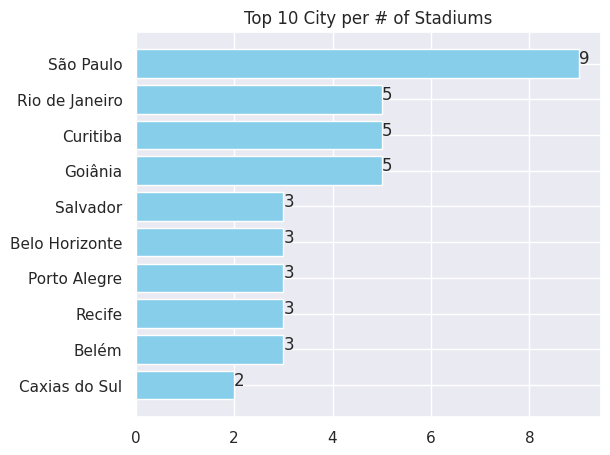

In [16]:
plt.subplots(figsize=(6, 5))
count_stadiums_per_city_top10 = count_stadiums_per_city_top10.sort_values(by='Stadium_Name',
                                                                          ascending=True)
labels = count_stadiums_per_city_top10['Locality']

plt.barh(labels, count_stadiums_per_city_top10['Stadium_Name'],
         color='skyblue')

plt.title('Top 10 City per # of Stadiums')

for index, value in enumerate(count_stadiums_per_city_top10['Stadium_Name']):
    plt.text(value, index, str(value), ha='left')

plt.show()

**Bottom 10 cidades por quantidade de estadios**

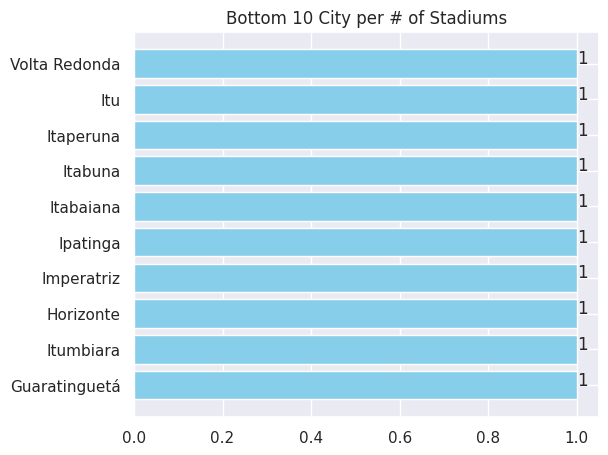

In [17]:
plt.subplots(figsize=(6, 5))
count_stadiums_per_city_bottom10 = count_stadiums_per_city_bottom10.sort_values(by='Stadium_Name',
                                                                          ascending=False)
labels = count_stadiums_per_city_bottom10['Locality']

plt.barh(labels, count_stadiums_per_city_bottom10['Stadium_Name'],
         color='skyblue')

plt.title('Bottom 10 City per # of Stadiums')

for index, value in enumerate(count_stadiums_per_city_bottom10['Stadium_Name']):
    plt.text(value, index, str(value), ha='left')

plt.show()

alterar visuais depois

In [18]:
pd.set_option('display.max_rows', None)

In [19]:
x = stadiums['Stadium_Name'][2]
print(x)

Morumbi


In [20]:
stadium_details['stadium_name'].head(10)

0                                             Maracanã
1                             Arena BRB Mané Garrincha
2              Morumbi Estádio Cícero Pompeu de Toledo
3    Arena Castelão Estádio Governador Plácido Castelo
4          Mineirão Estádio Governador Magalhães Pinto
5                   Arruda Estádio José do Rego Maciel
6          Estádio Mangueirão Estádio Olímpico do Pará
7                                      Parque do Sabiá
8                                    Estádio Beira-Rio
9                       Estádio Olímpico Nilton Santos
Name: stadium_name, dtype: object

In [21]:
x in stadium_details['stadium_name'][2]

True

In [22]:
stadium_details['stadium_name'][:10].str.contains(x, regex=False)

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: stadium_name, dtype: bool

In [23]:
import re

In [24]:
import warnings

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore')

In [25]:
count = 1
stadium_details['stadium_name_clean'] = 'x'
for ind, name in stadium_details['stadium_name'][:10].items():    

    for nickname in stadiums['Stadium_Name']:
                     
        if nickname in name:
    #       print("count", count)
            print('stadium details indice: ',ind)
            print('full name:', name)
            print('nickname :', nickname)
            print('------------')  
            stadium_details['stadium_name_clean'][ind] = nickname
    
    count += 1           


stadium details indice:  0
full name: Maracanã
nickname : Maracanã
------------
stadium details indice:  1
full name: Arena BRB Mané Garrincha
nickname : Mané Garrincha
------------
stadium details indice:  2
full name: Morumbi Estádio Cícero Pompeu de Toledo
nickname : Morumbi
------------
stadium details indice:  3
full name: Arena Castelão Estádio Governador Plácido Castelo
nickname : Castelão
------------
stadium details indice:  3
full name: Arena Castelão Estádio Governador Plácido Castelo
nickname : Castelão
------------
stadium details indice:  4
full name: Mineirão Estádio Governador Magalhães Pinto
nickname : Mineirão
------------
stadium details indice:  5
full name: Arruda Estádio José do Rego Maciel
nickname : Arruda
------------
stadium details indice:  6
full name:  Estádio Mangueirão Estádio Olímpico do Pará
nickname : Mangueirão
------------
stadium details indice:  6
full name:  Estádio Mangueirão Estádio Olímpico do Pará
nickname : Olímpico
------------
stadium detai

In [26]:
stadium_details[['stadium_name', 'stadium_name_clean']].head(15)

,stadium_name,stadium_name_clean
0,Maracanã,Maracanã
1,Arena BRB Mané Garrincha,Mané Garrincha
2,Morumbi Estádio Cícero Pompeu de Toledo,Morumbi
3,Arena Castelão Estádio Governador Plácido Castelo,Castelão
4,Mineirão Estádio Governador Magalhães Pinto,Mineirão
5,Arruda Estádio José do Rego Maciel,Arruda
6,Estádio Mangueirão Estádio Olímpico do Pará,Olímpico
7,Parque do Sabiá,Parque do Sabiá
8,Estádio Beira-Rio,Beira-Rio
9,Estádio Olímpico Nilton Santos,Nilton Santos


ainda precisa corrigir

ver.1.3